# COGS 108 - Final Project

## Overview
We have analyzed the return on investment of graduating from a private or public university and how your choice affects financial stability. Our initial hypothesis was that private schools have a measurable increase in financial stability that justifies their typically higher cost. We found that financial stability had a high positive correlation with cost of attendance and that low income families were the most significantly affected. We also found that loan debt and cost had no correlation. After this analysis, we concluded that our hypothesis is correct with an underlying cause that the more a student pays to go to college, the more likely they will be financially stable. 

### Group Members
* Race Hunter
* Camdyn Rasque
* Lawrence Shiu
* Anthony Garcia

### Group Members' IDs
* A11715904 (Race)
* A14043144 (Camdyn)
* A13549986 (Lawrence)
* A12911435 (Anthony)

## Introduction and Background

### Research Question
In the United States, does attending a private or public university, coupled with the cost of tuition, have any correlation with your job opportunities (measured by average starting salary) after graduation?

### Background and Prior Work
Our group was interested in this question since all members are currently enrolled in a public, 4-year research university. Consequently, the group has a partial vested interest in determining how their return on investment (ROI) will compare to their peers who attended a private, 4-year research university. Also, with loan debt on the rise, the cost of going into higher education is one of the major concerns for many future students. By answering this research question, we hope to better inform these individuals about the ROI when choosing between attending a public or a private university. Potentially, these findings could ease the financial burden affecting families across the nation and thus lower the country's average student loan debt.

After performing a web search on the topic, we found that several research articles have already been published relating to the question of interest. One post in a blog (1) examined whether the increase in earnings with a degree from a private university would outweigh any additional debt the students incur versus the earnings with a degree from a public university. To answer this question, researchers analyzed data from America's top 20 public and private universities. They compared average mid-career salaries, factoring in the cost of living expenses by subtracting these amounts from the accumulated earnings. The report concluded graduates from a private university earn approximately 10% more income than their public university peers. However, the report also recognized that private university graduates have more debt on average. From these findings, we wanted to focus more on the actual price students paid for their degrees &ndash; considering grants and other types of non-repayable funding offers. 

The inspiration began with a previous final project (2) where the group asked the questions, “Are universities worth the opportunity cost? Is going to college better than just having a high school degree?” From the analysis, that group was unable to definitively conclude if going to college was worth the cost. However, they did find that the earnings of individuals with their highest level of education being high school, have been steadily declining over the years. The group also uses two OLS regression tests to compare the determining factor between the earnings of the two groups.

References:
1. https://www.lexingtonlaw.com/blog/loans/public-vs-private-college-roi.html
2. https://github.com/COGS108/FinalProjects-Sp17/blob/master/081-FinalProject.ipynb

### Hypothesis
We expect to find that students who graduate from a private university will have a higher average starting salary than graduates from a public university. We also expect that for both private and public, there will be a positive correlation between cost of tuition and starting salary.

We came to this conclusion because of the market value of private universities. The education market has decided that the return on investment justified the increased cost.

## Data Description
The dataset comes from the college scorecard data compiled by the U.S. Department of Education (3). The files include data from 1996 through 2017 for all undergraduate degree-granting institutions. This data was last updated May 21, 2019.

The group was primarily interested in the following metrics: cost (which was separated into average cost of attendance, tuition/fees, and average net price by income level), aid, repayment using standard amorization, and earnings. The dataset also includes documentation reporting how the data was gathered and missing data for each category, as well as a dictionary that describes all the variables used.

The Department of Education claims to have taken extra precautions to limit the variability in the figures that are seen from a year-over-year basis (i.e. earnings and repayment). For privacy, data for any schools with fewer than 30 students have been supressed. In addition, all information relating to student loan debt that has not been reported is identified as PrivacySuppressed. This dataset is partially limited becuase starting salaries are only available for recipients of federal aid. Nevertheless, with 85% of university students receiving aid (4) and our target audience being potential recipients of aid, we concluded that this dataset was sufficient.

Overall, the data appears to be valid, current, ethical, and avoids all sources of bias. At over 7500 observations, there is sufficient data for analysis.

Reference:
3. https://collegescorecard.ed.gov/data/
4. https://nces.ed.gov/fastfacts/display.asp?id=31

#### Setup

In [1]:
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from astropy.table import Table, Column
from scipy.stats import ttest_ind, chisquare, normaltest

## Data Analysis

### Data Cleaning
2012 has the most recent set containing starting salaries. Here is a sample for an idea of how this dataset behaves.

In [2]:
df = pd.read_csv("Datasets/College Scorecard/MERGED2011_12_PP.csv")
df[0:5]

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP6_FTNFT_POOLED_SUPP,OMAWDP8_FTNFT_POOLED_SUPP,OMENRYP8_FTNFT_POOLED_SUPP,OMENRAP8_FTNFT_POOLED_SUPP,OMENRUP8_FTNFT_POOLED_SUPP,OMAWDP6_PTNFT_POOLED_SUPP,OMAWDP8_PTNFT_POOLED_SUPP,OMENRYP8_PTNFT_POOLED_SUPP,OMENRAP8_PTNFT_POOLED_SUPP,OMENRUP8_PTNFT_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(7675, 1899)

In [4]:
# remove all columns that have only NaN values
df = df.dropna(axis=1, how='all')
df.shape

(7675, 1613)

### Documentation from the dataset

1. **INSTN** = Name of college
2. **CONTROL** = Public, private, nonprofit, or private for-profit.
3. **HIGHDEG** = Type of max degree given
4. **TUITFTE** = Average revenue minus discounts and allowances
5. **AVGFACSAL** = Average faculty income monthly
6. **NPT4_PUB** = Average net yearly price for public university - grant aid
7. **NPT4_PRIV** = Average net yearly price for private university - grant aid
8. **PCTFLOAN** = Percentage of students who receive financial aid
9. **RET_FT4** = Retention rate of students
10. **MN_EARN_WNE_P6** = Average earn wages of graduates
11. **MN_EARN_WNE_INC1_P6** = Average wages of graduates who are from low income families 30,000 or less
12. **MN_EARN_WNE_INC2_P6** = Average wages of graduates who are from middle income families 30,001-75,000
13. **MN_EARN_WNE_INC3_P6** = Average wages of graduates who are from high income families 75,001+
14. **GT_25K_P6** = Percent of students who earn above 25k
15. **GRAD_DEBT_MDN** = Median loan debt accumulated by all graduates of that year
16. **COSTT4_A** = Average yearly cost of attendance

##### Here, we drop all the columns except for the ones we want to track. These are outlined above.

In [5]:
# gather only necessary data
df = df[['INSTNM', 'CONTROL','HIGHDEG', 'TUITFTE', 'AVGFACSAL', 'COSTT4_A', 'NPT4_PUB', 'NPT4_PRIV', 'PCTFLOAN', 'RET_FT4', 'MN_EARN_WNE_P6', 'MN_EARN_WNE_INC1_P6', 'MN_EARN_WNE_INC2_P6', 'MN_EARN_WNE_INC3_P6', 'GT_25K_P6', 'GRAD_DEBT_MDN']]
df.shape

(7675, 16)

In [6]:
df.head()

,INSTNM,CONTROL,HIGHDEG,TUITFTE,AVGFACSAL,COSTT4_A,NPT4_PUB,NPT4_PRIV,PCTFLOAN,RET_FT4,MN_EARN_WNE_P6,MN_EARN_WNE_INC1_P6,MN_EARN_WNE_INC2_P6,MN_EARN_WNE_INC3_P6,GT_25K_P6,GRAD_DEBT_MDN
0,Alabama A & M University,1,4,4626.0,6460.0,14965.0,8734.0,NaN,0.7903,0.6441,26100,24700,25800,30500,0.46229803562164,26499
1,University of Alabama at Birmingham,1,4,7289.0,9420.0,19547.0,15013.0,NaN,0.5355,0.7873,37400,37800,37800,36300,0.66048449277877,17000
2,Amridge University,2,4,11969.0,3500.0,11540.0,NaN,4422.0,0.7415,0.7500,38500,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.64666664600372,17740.5
3,University of Alabama in Huntsville,1,4,7264.0,8482.0,19072.0,9677.0,NaN,0.4779,0.7883,39300,36100,41800,41100,0.6605657339096,20000
4,Alabama State University,1,4,7220.0,6794.0,15986.0,5514.0,NaN,0.7694,0.5450,21200,20200,23400,21700,0.34222561120986,29002


##### Due to school size, some data is suppressed. We're going to remove those schools because they don't fit the comparison we're looking for. Some schools will also be dropped because they aren't four year universities.

In [7]:
# remove all schools that don't display income of graduates
df = df[df.MN_EARN_WNE_INC1_P6 != 'PrivacySuppressed']
df = df[df.MN_EARN_WNE_INC2_P6 != 'PrivacySuppressed']
df = df[df.MN_EARN_WNE_INC3_P6 != 'PrivacySuppressed']
df = df[df.GRAD_DEBT_MDN != 'PrivacySuppressed']
df.shape

(3839, 16)

In [8]:
# make sure we're looking at only 4 year universities
df = df[df['HIGHDEG'] >= 4]
df.shape

(1408, 16)

In [9]:
# change earning's data from string to float
df['MN_EARN_WNE_P6'] = pd.to_numeric(df['MN_EARN_WNE_P6'])
df['MN_EARN_WNE_INC1_P6'] = pd.to_numeric(df['MN_EARN_WNE_INC1_P6'])
df['MN_EARN_WNE_INC2_P6'] = pd.to_numeric(df['MN_EARN_WNE_INC2_P6'])
df['MN_EARN_WNE_INC3_P6'] = pd.to_numeric(df['MN_EARN_WNE_INC3_P6'])
df['GRAD_DEBT_MDN'] = pd.to_numeric(df['GRAD_DEBT_MDN'])

In [10]:
# make sure all data is valid
df = df[np.isfinite(df['MN_EARN_WNE_P6'])]
df = df[np.isfinite(df['MN_EARN_WNE_INC1_P6'])]
df = df[np.isfinite(df['MN_EARN_WNE_INC2_P6'])]
df = df[np.isfinite(df['MN_EARN_WNE_INC3_P6'])]
df = df[np.isfinite(df['GRAD_DEBT_MDN'])]
df.shape

(1396, 16)

##### Finally, we organize the remaining schools, separating them into public and private schools.

In [11]:
# split data into private and public
df_private = df[df['CONTROL'] == 2]
df_public = df[df['CONTROL'] == 1]
print(df_private.shape)
print(df_public.shape)

(706, 16)
(504, 16)


### Data Visualization

##### Explore the average earnings

<function matplotlib.pyplot.show(*args, **kw)>

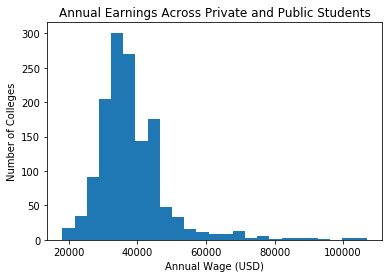

In [12]:
# Plot the aggregate data
plt.hist(df['MN_EARN_WNE_P6'], bins = 25)
plt.title("Annual Earnings Across Private and Public Students")
plt.xlabel("Annual Wage (USD)")
plt.ylabel('Number of Colleges')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

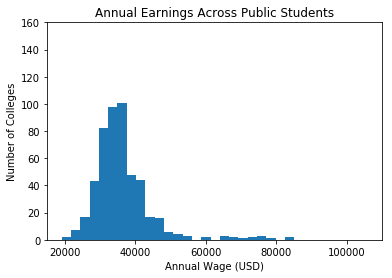

In [13]:
# Plot just the public schools
plt.hist(df_public['MN_EARN_WNE_P6'], bins = 25)
plt.xlim(left=15000, right=110000)
plt.ylim(bottom=0, top=160)
plt.title("Annual Earnings Across Public Students")
plt.xlabel("Annual Wage (USD)")
plt.ylabel('Number of Colleges')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

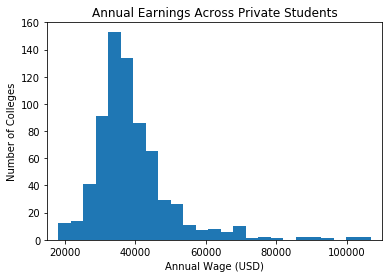

In [14]:
# Plot just the private schools
plt.hist(df_private['MN_EARN_WNE_P6'], bins = 25)
plt.xlim(left=15000, right=110000)
plt.ylim(bottom=0, top=160)
plt.title("Annual Earnings Across Private Students")
plt.xlabel("Annual Wage (USD)")
plt.ylabel("Number of Colleges")
plt.show

##### Look at averages

In [26]:
avgPrivateEarnings = np.mean(df_private['MN_EARN_WNE_P6'])
avgPublicEarnings = np.mean(df_public['MN_EARN_WNE_P6'])
print("Total mean: $%d per year" %np.mean(df['MN_EARN_WNE_P6']))
print("Public mean: $%d per year" %avgPublicEarnings)
print("Private mean: $%d per year" %avgPrivateEarnings)

Total mean: $38196 per year
Public mean: $36452 per year
Private mean: $39233 per year


## Data Analysis & Results

### Metric 1 - Job Opportunities After College

In this section we investigate if the type of university affects job opportunities afterwards. We compared the wages of graduates of a public and those of a private university. We used t-tests with an alpha value of 5% to test if there was a significant difference. We showed the mean and median below the graph to highlight the spread and skew of the values.

Next, we conducted a t-test for the percentage of students who were hired with a starting salary of more than $25k per year to compare the ease of getting a job between public and private graduates.


T-Test for the Lowest Income (<$30k/year) families


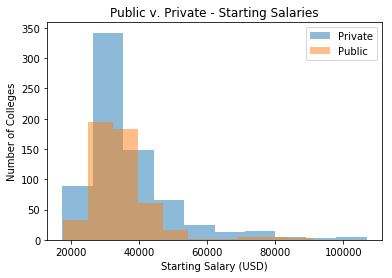

P-Value (4-Decimals): 0.0119
Reject the Null Hypothesis (Alpha=5%): True

Public salaries mean: $34,875.79
Private salaries mean: $36,618.41
Difference: +5.00%

Public salaries median: $33,200.00
Private salaries median: $32,800.00
Difference: -1.20%


In [23]:
# T-Test for the Lowest Income Families

Priv_Wage = df_private['MN_EARN_WNE_INC1_P6']
Pub_Wage = df_public['MN_EARN_WNE_INC1_P6']

t_val, p_val = ttest_ind(Pub_Wage, Priv_Wage)
print()
print("T-Test for the Lowest Income (<$30k/year) families")
plt.hist(Priv_Wage, alpha=0.5, label='Private')
plt.hist(Pub_Wage, alpha=0.5, label='Public')
plt.title('Public v. Private - Starting Salaries')
plt.xlabel('Starting Salary (USD)')
plt.ylabel('Number of Colleges')
plt.legend(loc='upper right')
plt.show()
print("P-Value (4-Decimals): ", round(p_val, 4), sep='')
print("Reject the Null Hypothesis (Alpha=5%):", p_val < 0.05)
print()
print("Public salaries mean: ${:,.2f}".format(Pub_Wage.mean()), sep='')
print("Private salaries mean: ${:,.2f}".format(Priv_Wage.mean()), sep='')
print("Difference: +{:,.2f}".format(((Priv_Wage.mean()-Pub_Wage.mean()) / Pub_Wage.mean()) * 100), "%", sep='')
print()
print("Public salaries median: ${:,.2f}".format(Pub_Wage.median()), sep='')
print("Private salaries median: ${:,.2f}".format(Priv_Wage.median()), sep='')
print("Difference: {:,.2f}".format(((Priv_Wage.median()-Pub_Wage.median()) / Pub_Wage.median()) * 100), "%", sep='')


T-Test for the Middle Income ($30-70k/year) families


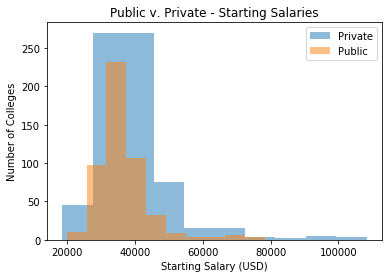

P-Value (4-Decimals): 0.0
Reject the Null Hypothesis (Alpha=5%): True

Public salaries mean: $36,744.05
Private salaries mean: $39,474.36
Difference: +7.43%

Public salaries median: $35,500.00
Private salaries median: $37,700.00
Difference: +6.20%


In [17]:
# T-Test for the Middle Income People

Priv_Wage = df_private['MN_EARN_WNE_INC2_P6']
Pub_Wage = df_public['MN_EARN_WNE_INC2_P6']

t_val, p_val = ttest_ind(Pub_Wage, Priv_Wage)
print()
print("T-Test for the Middle Income ($30-70k/year) families")
plt.hist(Priv_Wage, alpha=0.5, label='Private')
plt.hist(Pub_Wage, alpha=0.5, label='Public')
plt.title('Public v. Private - Starting Salaries')
plt.xlabel('Starting Salary (USD)')
plt.ylabel('Number of Colleges')
plt.legend(loc='upper right')
plt.show()
print("P-Value (4-Decimals): ", round(p_val, 4), sep='')
print("Reject the Null Hypothesis (Alpha=5%):", p_val < 0.05)
print()
print("Public salaries mean: ${:,.2f}".format(Pub_Wage.mean()), sep='')
print("Private salaries mean: ${:,.2f}".format(Priv_Wage.mean()), sep='')
print("Difference: +{:,.2f}".format(((Priv_Wage.mean()-Pub_Wage.mean()) / Pub_Wage.mean()) * 100), "%", sep='')
print()
print("Public salaries median: ${:,.2f}".format(Pub_Wage.median()), sep='')
print("Private salaries median: ${:,.2f}".format(Priv_Wage.median()), sep='')
print("Difference: +{:,.2f}".format(((Priv_Wage.median()-Pub_Wage.median()) / Pub_Wage.median()) * 100), "%", sep='')


T-Test for the High Income (>$70k/year) families


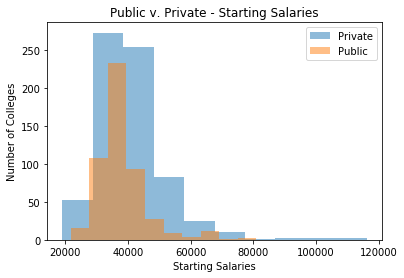

P-Value (4-Decimals): 0.0
Reject the Null Hypothesis (Alpha=5%): True

Public salaries mean: $38,096.83
Private salaries mean: $41,203.68
Difference: +8.16%

Public salaries median: $36,650.00
Private salaries median: $39,600.00
Difference: +8.05%


In [18]:
# T-Test for the High Income People

Priv_Wage = df_private['MN_EARN_WNE_INC3_P6']
Pub_Wage = df_public['MN_EARN_WNE_INC3_P6']

t_val, p_val = ttest_ind(Pub_Wage, Priv_Wage)
print()
print("T-Test for the High Income (>$70k/year) families")
plt.hist(Priv_Wage, alpha=0.5, label='Private')
plt.hist(Pub_Wage, alpha=0.5, label='Public')
plt.title('Public v. Private - Starting Salaries')
plt.xlabel('Starting Salaries')
plt.ylabel('Number of Colleges')
plt.legend(loc='upper right')
plt.show()
print("P-Value (4-Decimals): ", round(p_val, 4), sep='')
print("Reject the Null Hypothesis (Alpha=5%):", p_val < 0.05)
print()
print("Public salaries mean: ${:,.2f}".format(Pub_Wage.mean()), sep='')
print("Private salaries mean: ${:,.2f}".format(Priv_Wage.mean()), sep='')
print("Difference: +{:,.2f}".format(((Priv_Wage.mean()-Pub_Wage.mean()) / Pub_Wage.mean()) * 100), "%", sep='')
print()
print("Public salaries median: ${:,.2f}".format(Pub_Wage.median()), sep='')
print("Private salaries median: ${:,.2f}".format(Priv_Wage.median()), sep='')
print("Difference: +{:,.2f}".format(((Priv_Wage.median()-Pub_Wage.median()) / Pub_Wage.median()) * 100), "%", sep='')

#### The Percent of Alumni Making More Than $25,000/Year


Percent of Recent Graduates Making More than $25k/year


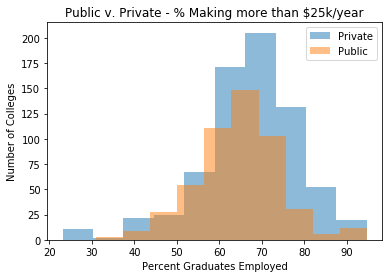

P-Value (4-Decimals): 0.0003
Reject the Null Hypothesis (Alpha=5%): True

Public Employed mean: 64.64%
Private  Employed mean: 66.99%
Difference: +3.64

Public Employed median: 65.38%
Private  Employed median: 67.69%
Difference: +3.53


In [19]:
pub_employed = df_public['GT_25K_P6'].astype(float)
priv_employed = df_private['GT_25K_P6'].astype(float)
pub_employed *= 100
priv_employed *= 100

t_val, p_val = ttest_ind(pub_employed, priv_employed)
print()
print("Percent of Recent Graduates Making More than $25k/year")
plt.hist(priv_employed, alpha=0.5, label='Private')
plt.hist(pub_employed, alpha=0.5, label='Public')
plt.title('Public v. Private - % Making more than $25k/year')
plt.xlabel('Percent Graduates Employed')
plt.ylabel('Number of Colleges')
plt.legend(loc='upper right')
plt.show()
print("P-Value (4-Decimals): ", round(p_val, 4), sep='')
print("Reject the Null Hypothesis (Alpha=5%):", p_val < 0.05)
print()
print("Public Employed mean: {:,.2f}".format(pub_employed.mean()), "%", sep='')
print("Private  Employed mean: {:,.2f}".format(priv_employed.mean()), "%", sep='')
print("Difference: +{:,.2f}".format(((priv_employed.mean()-pub_employed.mean()) / pub_employed.mean()) * 100), sep='')
print()
print("Public Employed median: {:,.2f}".format(pub_employed.median()), "%", sep='')
print("Private  Employed median: {:,.2f}".format(priv_employed.median()), "%", sep='')
print("Difference: +{:,.2f}".format(((priv_employed.median()-pub_employed.median()) / pub_employed.median()) * 100), sep='')

### Job Opportunity Analysis



The results we found aligned with our hypothesis. We found that there was a significant difference between the starting salaries of public and private university graduates through all family income levels before graduation. Starting from the lowest income level, there was on average a 5% difference in mean starting salary and a -1% difference in median starting salary, showing a wide spread. The middle-class income level had a 7% mean and 6% median increase for private, and the high level had 8% increase for both respectively.

We also found that there was a statistically significant difference in the percent of graduates who had a starting salary of more than $25k per year. The mean and the median difference between public and private university graduates was about a 3.5\% increase in students who achieved that income level.

## Metric 2 - Collegiate Value

### Defining Collegiate Value
We define collegiate value as the return on the investment in the cost of attendance. We compare the average starting salaries for each of the three family income categories versus the average cost of tuition. Afterwards, we test the correlation between cost of tuition and the median loan debt.

### College Value Analysis

In [25]:
pub_cost = df_public['COSTT4_A']
priv_cost = df_private['COSTT4_A']

pub_lowinc = df_public['MN_EARN_WNE_INC1_P6']
pub_midinc = df_public['MN_EARN_WNE_INC2_P6']
pub_highinc = df_public['MN_EARN_WNE_INC3_P6']

priv_lowinc = df_private['MN_EARN_WNE_INC1_P6']
priv_midinc = df_private['MN_EARN_WNE_INC2_P6']
priv_highinc = df_private['MN_EARN_WNE_INC3_P6']

pub_corr_low = round(pub_cost.corr(pub_lowinc), 3)
pub_corr_mid = round(pub_cost.corr(pub_midinc), 3)
pub_corr_high = round(pub_cost.corr(pub_highinc), 3)

priv_corr_low = round(priv_cost.corr(priv_lowinc), 3)
priv_corr_mid = round(priv_cost.corr(priv_midinc), 3)
priv_corr_high = round(priv_cost.corr(priv_highinc), 3)

print()
print('Correlation between tuition cost and starting salaries')
print('separated by family income levels')
print()

a = ['(<$30k)  Low', '($30-70k)  Mid', '(>$70k) High']
b = [pub_corr_low, pub_corr_mid, pub_corr_high]
c = [priv_corr_low, priv_corr_mid, priv_corr_high]
t = Table([a, b, c], names=(' Family Income', '  Public', '  Private'))
print(t)

pub_loan = df_public['GRAD_DEBT_MDN']
priv_loan = df_private['GRAD_DEBT_MDN']

pub_corr_loan = round(pub_cost.corr(pub_loan), 3)
priv_corr_loan = round(priv_cost.corr(priv_loan), 3)

print()
print()
print()
print("Correlation b/w cost of tuition and median loan debt")
print()
print(" Public Universities:  ", pub_corr_loan, sep='')
print("Private Universities:  ", priv_corr_loan, sep='')
print("          Difference: ", round(priv_corr_loan-pub_corr_loan, 3), sep='') 


Correlation between tuition cost and starting salaries
separated by family income levels

 Family Income   Public   Private
-------------- -------- ---------
  (<$30k)  Low    0.441     0.591
($30-70k)  Mid    0.329     0.473
  (>$70k) High    0.277     0.357



Correlation b/w cost of tuition and median loan debt

 Public Universities:  0.294
Private Universities:  0.082
          Difference: -0.212


### Collegiate Value Data Interpretation

The results we found aligned with our hypothesis. We found that the correlation between the starting salaries of recent college graduates and tuition cost was stronger for private university students &ndash; no matter which family income level they came from. The strongest correlation is between private college tuition cost and starting salaries for graduates from a low income family.

After finding this, we test the correlation between private universities' cost of tuition and the loan debt of graduates, since they have a higher average expense. Surprisingly, private universities had no correlation whatsoever. Conversely, public universities had a mild correlation between the cost of tuition and median loan debt.

## Ethics and Privacy

### Data Collection
The dataset contains sensitive data that would be illegal and unethical to disclose without the consent of the participants. Fortunately, the dataset has been gathered with the consent of those surveyed. According to the documentation for the College Scorecard, these data are provided through federal reporting from institutions, data on federal financial aid, and tax information. 

### Data Storage
There is no easily apparent method for one to request their information to be removed from the data set, nor does the source say how long they plan on keeping the data. Since these data were collected from federal sources they adhere to the Safe Harbor Method guidelines on data privacy.

### Analysis
When doing our analysis, the largest source of possible bias is the economic background of students' families and their choice of university, as students from higher income families are more likely to attend private universities. Our dataset controls this by splitting up students into three categories based on their family's yearly income: families who make less than \\$30k, families who make between \\$30k and \\$75k, and families who make \\$75K+.

### Bias
As all of the group members currently attend a public university, there is a valid concern regarding the potential bias we might have when calculating the statistics and presenting our data. We aim to maintain the highest level of objectivity when examining the data.

### Potential for Harm
Our conclusion that low income families gain the most from going to an expensive private college may lead students to lean towards the more expensive option. This can put financial strain on or even bankrupt some families. 

Additionally, private colleges could use this research to justify increasing tuition.

## Conclusion and Discussion

We expected to find that students who graduate from a private university will have a higher average starting salary than graduates from a public university. We also expected that for both private and public, there will be a positive correlation between cost of tuition and starting salary. After cleaning the dataset, we decided on two metrics for testing our hypothesis.

The first metric looked into the job opportunities for students after college. By partitioning the students into three income brackets (low, middle, high), a t-test found that the differences were significant at each income level, and private university graduates do earn more than their public university peers.

From these results, we considered two seemingly independent variables: average cost of tuition and median loan debt. Our second metric aimed to determine if return on investment was greater for private graduates compared to public graduates. This “collegiate value” indicated a stronger correlation between the tuition cost and starting salaries of private university graduates compared to public graduates. We then determined that for private universities the cost of tuition and median loan debt are not correlated while public universities showed a minor correlation.

In the end, these two metrics supported our original hypothesis that attending a more expensive private university over a less expensive public university is worth the extra cost. There is a correlation between job opportunities and college type. However, this study does have certain limitations: the starting salary data is only provided for students who received federal financial aid. Therefore, this study is not factoring in students who paid completely out-of-pocket for their college education, or those who have switched college types during their 4-year degree.  